#**Exercise (part 1) about:**
## ✓ Data Pipelines.
## ✓ NoSQL database connection.
## ✓ Use and connection in APIs.
## ✓ Data Lake in S3 AWS.
## ✓ Distributed data processing.  

***Install and manage software packages for the exercice***

In [ ]:
!pip install ibge # package from Pypi (Collection of APIs for the IBGE [Brazilian Institute of Geography and Statistics] Data Services in Brazil)
!pip install boto3 # For connection with AWS S3
!pip install pymongo[srv] # For connection with mongodb in cloud. 

     |████████████████████████████████| 133kB 6.0MB/s 
     |████████████████████████████████| 71kB 4.0MB/s 
     |████████████████████████████████| 7.2MB 7.3MB/s 
     |████████████████████████████████| 143kB 43.6MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
     |████████████████████████████████| 194kB 4.9MB/s 


**Importing modules to be used**

In [ ]:
from bson.json_util import dumps
from ibge.localidades import *
import boto3
import json
import pymongo

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


**Assigning and testing ibge loading**

In [ ]:
dataRegiao = Regioes()
dataRegiao.count()

5

In [ ]:
dataEstado = Estados()
dataEstado.count()

27

In [ ]:
dataMunicipio = Municipios()
dataMunicipio.count()

5570

In [ ]:
dataRegiao.json()

[{'id': 1, 'nome': 'Norte', 'sigla': 'N'},
 {'id': 2, 'nome': 'Nordeste', 'sigla': 'NE'},
 {'id': 3, 'nome': 'Sudeste', 'sigla': 'SE'},
 {'id': 4, 'nome': 'Sul', 'sigla': 'S'},
 {'id': 5, 'nome': 'Centro-Oeste', 'sigla': 'CO'}]

In [ ]:
dataEstado.json()

[{'id': 11,
  'nome': 'Rondônia',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'RO'},
 {'id': 12,
  'nome': 'Acre',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'AC'},
 {'id': 13,
  'nome': 'Amazonas',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'AM'},
 {'id': 14,
  'nome': 'Roraima',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'RR'},
 {'id': 15,
  'nome': 'Pará',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'PA'},
 {'id': 16,
  'nome': 'Amapá',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'AP'},
 {'id': 17,
  'nome': 'Tocantins',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'TO'},
 {'id': 21,
  'nome': 'Maranhão',
  'regiao': {'id': 2, 'nome': 'Nordeste', 'sigla': 'NE'},
  'sigla': 'MA'},
 {'id': 22,
  'nome': 'Piauí',
  'regiao': {'id': 2, 'nome': 'Nordeste', 'sigla': 'NE'},
  'sigla': 'PI'},
 {'id': 23,
  'nome': 'Ceará',
  'regiao': {'id': 2,

In [ ]:
dataMunicipio.json()

**Connect to database in Mongodb Cloud**

In [ ]:
client = pymongo.MongoClient("mongodb+srv://<user>:<password>@unicluster.ixhvw.mongodb.net/ibge?retryWrites=true&w=majority")

In [ ]:
banco = client.ibge
album = banco.pnadc20203
album.find_one()

{'_id': ObjectId('600ce0685daa95c6616007ac'),
 'ano': 2020,
 'anosesco': 0.0,
 'cor': 'Parda',
 'graduacao': None,
 'horastrab': None,
 'idade': 62,
 'ocup': None,
 'renda': None,
 'sexo': 'Mulher',
 'trab': 'Pessoas fora da força de trabalho',
 'trimestre': 3,
 'uf': 'Acre'}

**Downloading the pnadc20203 (in database ibge) collection and converting it to the json file**

In [ ]:
cursor = album.find({})
with open('pnadc20203.json', 'w') as file:
        file.write('[')
        for document in cursor:
            file.write(dumps(document))
            file.write(',')
        file.write(']')

**Extracting the Region, State and county of ibge API and converting to Json**

In [ ]:
with open('dataRegiao.json', 'w') as outfile:
    json.dump(dataRegiao.json(), outfile)
with open('dataEstado.json', 'w') as outfile:
    json.dump(dataEstado.json(), outfile)    
with open('dataMunicipio.json', 'w') as outfile:
    json.dump(dataMunicipio.json(), outfile)

**Loading JSON files to S3 AWS**

In [ ]:
ACCESS_KEY = '<AccessKey>'
SECRET_KEY = '<SecretKey>'


def upload_to_aws(local_file, bucket, s3_file):
    s3 = boto3.client('s3', aws_access_key_id=ACCESS_KEY,
                      aws_secret_access_key=SECRET_KEY)

    try:
        s3.upload_file(local_file, bucket, s3_file)
        print("Upload Successful")
        return True
    except FileNotFoundError:
        print("The file was not found")
        return False
    except NoCredentialsError:
        print("Credentials not available")
        return False

# Uploading files with the function 'upload_to_aws' created before
uploaded = upload_to_aws('dataRegiao.json', 'igti-bootcamp-ed-2021-evangelista', 'regiao.json')
uploaded = upload_to_aws('dataEstado.json', 'igti-bootcamp-ed-2021-evangelista', 'estado.json')
uploaded = upload_to_aws('dataMunicipio.json', 'igti-bootcamp-ed-2021-evangelista', 'municipio.json')
uploaded = upload_to_aws('pnadc20203.json', 'igti-bootcamp-ed-2021-evangelista', 'mulheres.json')

Upload Successful
Upload Successful
Upload Successful
Upload Successful


**Files copied to AWS S3.**

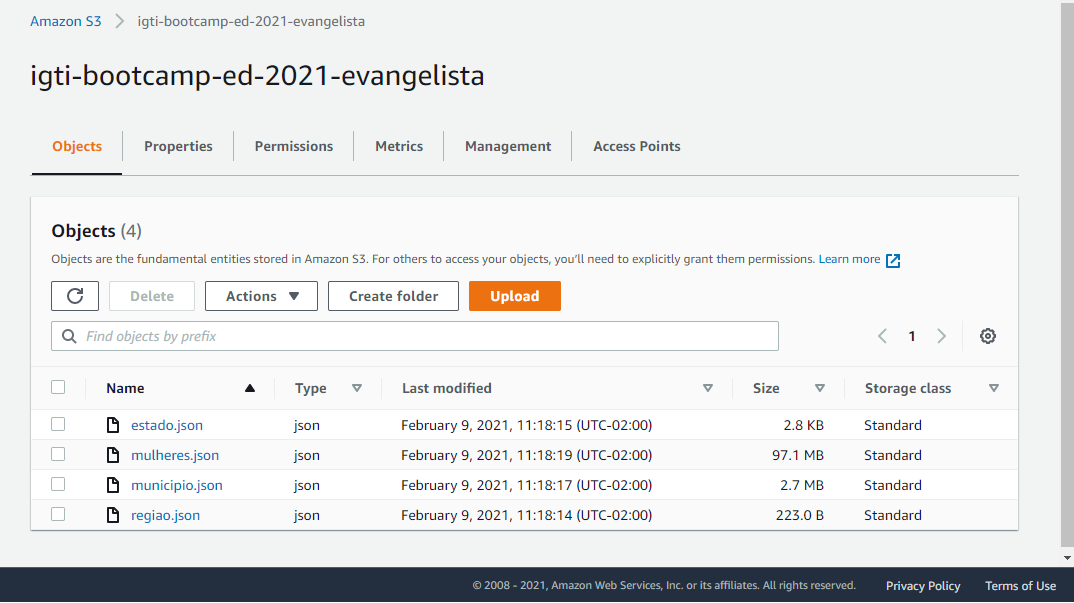

In [17]:
from IPython.display import Image
Image('ResultadoS3.png')